<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/Decision_Tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
dataset = pd.read_csv('Social_Network_Ads_2.csv')
input = dataset.drop(['Purchased'],axis='columns')
y = dataset['Purchased']

In [3]:
input.head(5)

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000


## Data pre-processing

In [4]:
input['Age'] = pd.qcut(input['Age'], 3 ,labels=["Youngest","Young","Old"])

In [5]:
input.head(5)

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,Youngest,19000
1,15810944,Male,Young,20000
2,15668575,Female,Youngest,43000
3,15603246,Female,Youngest,57000
4,15804002,Male,Youngest,76000


In [6]:
from sklearn.preprocessing import LabelEncoder
le_age = LabelEncoder()
input['Age'] = le_age.fit_transform(input['Age'])

In [7]:
input.head(5)

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,2,19000
1,15810944,Male,1,20000
2,15668575,Female,2,43000
3,15603246,Female,2,57000
4,15804002,Male,2,76000


In [8]:
dummies = pd.get_dummies(input['Gender'])
input = pd.concat([input,dummies], axis='columns')
input = input.drop(['User ID','Gender'], axis='columns')
input.head(5)

,Age,EstimatedSalary,Female,Male
0,2,19000,0,1
1,1,20000,0,1
2,2,43000,1,0
3,2,57000,1,0
4,2,76000,0,1


In [9]:
X = input.values
print(X)

[[    2 19000     0     1]
 [    1 20000     0     1]
 [    2 43000     1     0]
 ...
 [    0 20000     1     0]
 [    1 33000     0     1]
 [    0 36000     1     0]]


## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
print(X_train)

[[     0  39000      1      0]
 [     2 120000      0      1]
 [     1  50000      1      0]
 ...
 [     1  52000      0      1]
 [     2  54000      1      0]
 [     2 118000      1      0]]


## Training the Decision Tree Classification model on the Training set

In [17]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[Text(0.5, 0.875, 'x[0] <= 0.5\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.25, 0.625, 'x[1] <= 38500.0\ngini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.125, 0.375, 'x[1] <= 22500.0\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.375, 0.375, 'x[1] <= 85000.0\ngini = 0.421\nsamples = 73\nvalue = [22, 51]'),
 Text(0.3125, 0.125, 'gini = 0.498\nsamples = 36\nvalue = [17, 19]'),
 Text(0.4375, 0.125, 'gini = 0.234\nsamples = 37\nvalue = [5, 32]'),
 Text(0.75, 0.625, 'x[1] <= 90500.0\ngini = 0.282\nsamples = 200\nvalue = [166, 34]'),
 Text(0.625, 0.375, 'x[1] <= 69500.0\ngini = 0.058\nsamples = 166\nvalue = [161, 5]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 101\nvalue = [101, 0]'),
 Text(0.6875, 0.125, 'gini = 0.142\nsamples = 65\nvalue = [60, 5]'),
 Text(0.875, 0.375, 'x[1] <= 119000.0\ngini = 0.251\nsamples = 34\nvalue = [

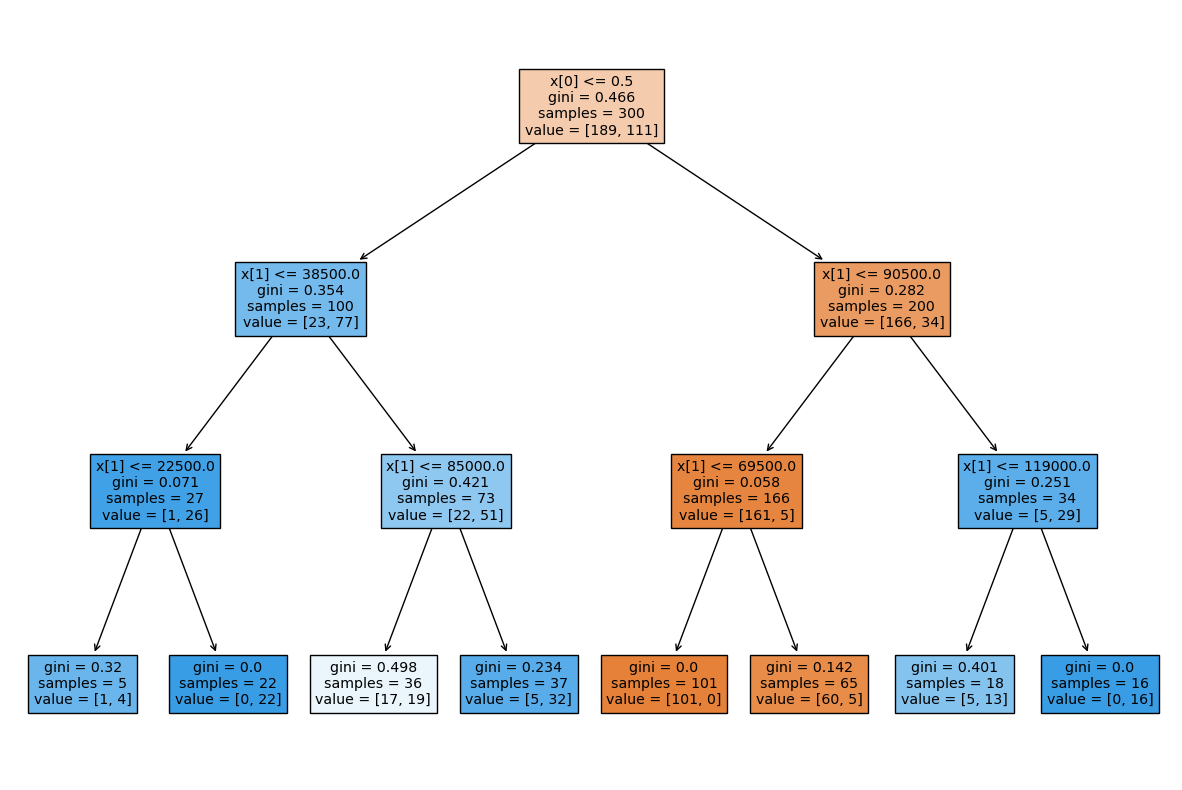

In [18]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [19]:
print(tree.export_text(classifier))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 38500.00
|   |   |--- feature_1 <= 22500.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  22500.00
|   |   |   |--- class: 1
|   |--- feature_1 >  38500.00
|   |   |--- feature_1 <= 85000.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  85000.00
|   |   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 90500.00
|   |   |--- feature_1 <= 69500.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  69500.00
|   |   |   |--- class: 0
|   |--- feature_1 >  90500.00
|   |   |--- feature_1 <= 119000.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  119000.00
|   |   |   |--- class: 1



##Model Evaluation

In [20]:
score = accuracy_score(y_test, y_pred)
print(score)

0.92


## Making the Confusion Matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[61  7]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        68
           1       0.82      0.97      0.89        32

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100



## Predict Unseen

In [22]:
classifier.predict([[0,39500,1,0]])

array([1])

In [ ]:
# The End